In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  


In [15]:
data = np.loadtxt('CasasSimple.txt')

X = np.c_[np.ones(data.shape[0]),data[:,0]/100]
y = np.c_[data[:,1]/100000]

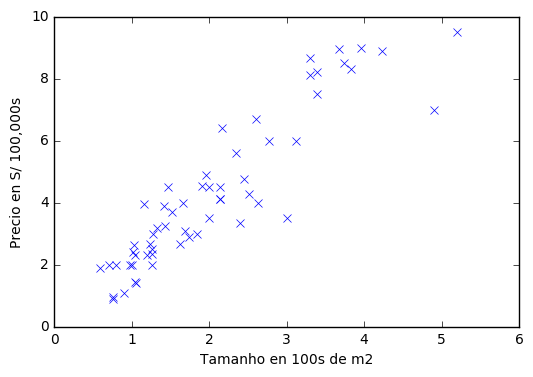

In [16]:
plt.plot(X[:,1], y, 'x')
plt.xlim(0,6)
plt.xlabel('Tamanho en 100s de m2')
plt.ylabel('Precio en S/ 100,000s')

In [17]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = np.sum(np.square(h-y))/(2*m)
    
    return(J)

In [18]:
computeCost(X,y)

12.075742856379312

In [19]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.0001, num_iters=10000):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - (alpha*(X.T.dot(h-y)))/m
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [ 0.61637593  1.82328724]


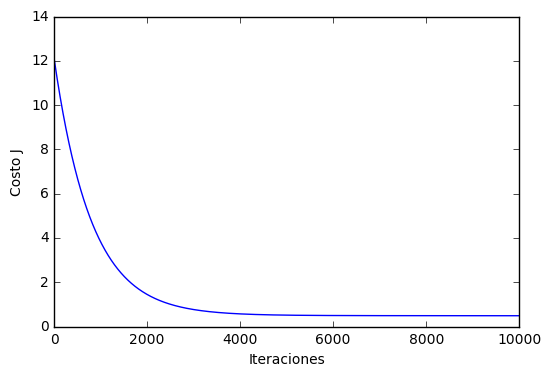

In [20]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Costo J')
plt.xlabel('Iteraciones');

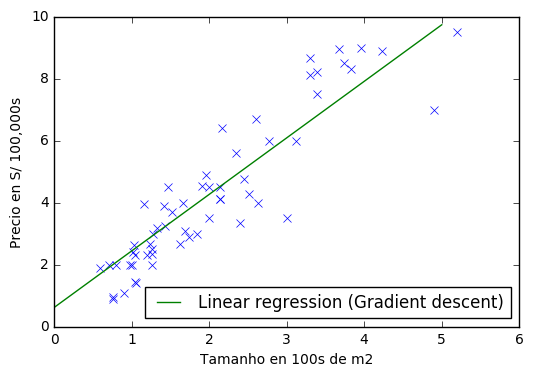

In [21]:
xx = np.arange(0,6)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.plot(X[:,1], y, 'x')
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

plt.xlim(0,6)
plt.xlabel('Tamanho en 100s de m2')
plt.ylabel('Precio en S/ 100,000s')
plt.legend(loc=4);

In [22]:
# Predict price for houses of 200m2 and 420m2
print(theta.T.dot([1, 2])*100000)
print(theta.T.dot([1, 4.2])*100000)

[ 426295.04173418]
[ 827418.23488892]


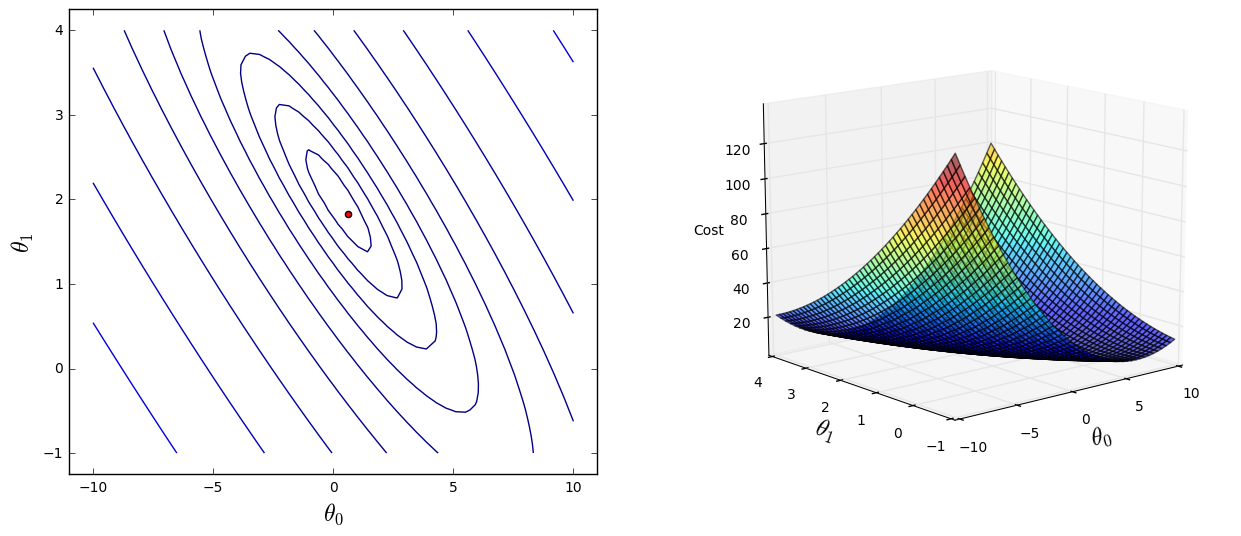

In [23]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)